In [9]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [10]:
max_length0 = '100mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*-combined.csv'

In [11]:
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            kernel_substring_location = filename.find('kernel')
            kernel_number = filename[kernel_substring_location - 2:kernel_substring_location]
            if not kernel_number.isnumeric:
                kernel_number = kernel_number[1:len(kernel_number)]
            ksize = int(kernel_number)
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
    return kernel_sizes, accuracy_values

In [12]:
def cal_average(kernel_sizes, accuracy_values):
    new_kernel_sizes = [kernel_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_kernel = kernel_sizes[0]
    current_idx = 0
    current_kernel_count = 1
    for i in range(1, len(kernel_sizes)):
        next_kernel = kernel_sizes[i]
        if next_kernel != current_kernel:
            current_kernel = next_kernel
            current_kernel_count = 1
            current_idx += 1
            new_kernel_sizes.append(next_kernel)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_kernel_count
            current_kernel_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_kernel_count
    print(len(new_kernel_sizes), len(new_accuracy_values))
    print(new_kernel_sizes, new_accuracy_values)
    return new_kernel_sizes, new_accuracy_values

In [13]:
layers0 = '4cnn'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)
kernel_sizes0, accuracy_values0 = cal_average(kernel_sizes0, accuracy_values0)

10 10
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20] [0.9741974806989028, 0.9737911418122714, 0.965258025193011, 0.9693214140593256, 0.9715562779357984, 0.9721657862657456, 0.9622104835432752, 0.9605851279967492, 0.9374238114587566, 0.9546932141405932]


In [14]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)
kernel_sizes1, accuracy_values1 = cal_average(kernel_sizes1, accuracy_values1)

10 10
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20] [0.9731816334823242, 0.9758228362454286, 0.9678992279561154, 0.9520520113774888, 0.9622104835432752, 0.9654611946363268, 0.9595692807801708, 0.960178789110118, 0.9506298252742788, 0.9414872003250712]


In [15]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)
kernel_sizes2, accuracy_values2 = cal_average(kernel_sizes2, accuracy_values2)

10 10
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20] [0.9636326696464852, 0.9672897196261684, 0.9609914668833808, 0.9463632669646486, 0.9473791141812272, 0.9427062169849656, 0.9567249085737504, 0.9475822836245428, 0.9538805363673304, 0.9457537586347012]


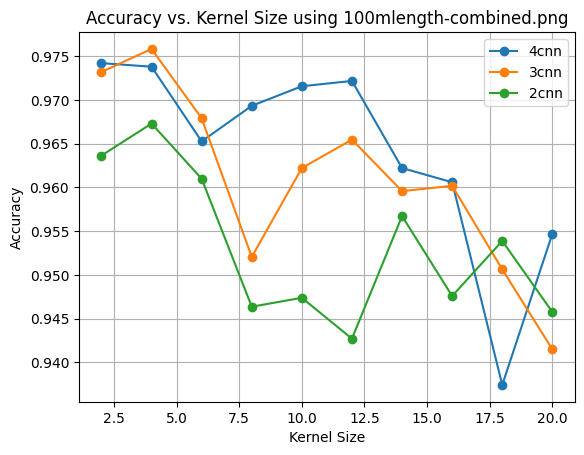

In [16]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Size using {0}-combined.png'.format(max_length0))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}-combined.png'.format(max_length0))
plt.show()